In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


from google.colab import files
uploaded = files.upload()

df = pd.read_csv("database_clean.csv")

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18267 entries, 0 to 18266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           18267 non-null  int64 
 1   title            18267 non-null  object
 2   company          18267 non-null  object
 3   location         18267 non-null  object
 4   posted           18267 non-null  object
 5   contract_format  18267 non-null  object
 6   work_mode        18267 non-null  object
 7   qualifications   18267 non-null  object
 8   description      18267 non-null  object
 9   url              18267 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [ ]:
df = df.dropna(subset=["title", "qualifications"]).copy()
df["nb_competences"] = df["qualifications"].apply(lambda x: len(str(x).split(',')))



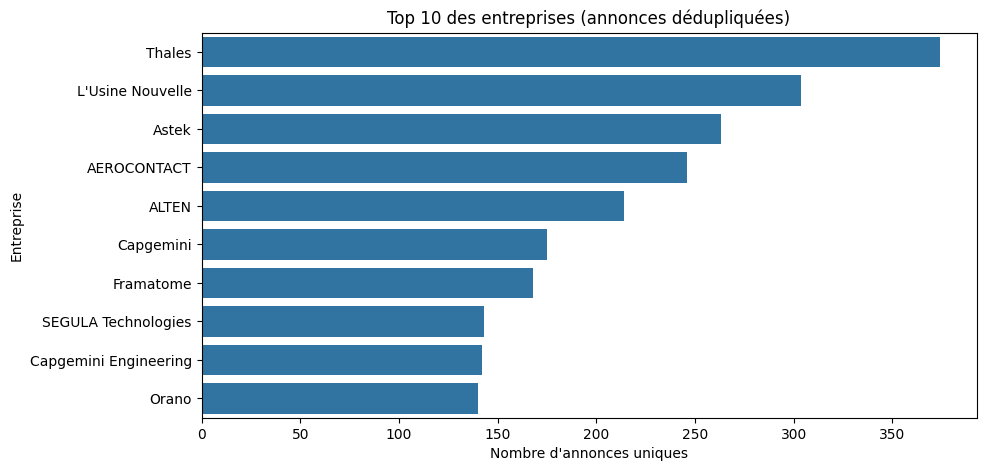

In [ ]:
df_unique = df.drop_duplicates(subset=["title", "company"])
top_companies = df_unique["company"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top 10 des entreprises (annonces dédupliquées)")
plt.xlabel("Nombre d'annonces uniques")
plt.ylabel("Entreprise")
plt.show()

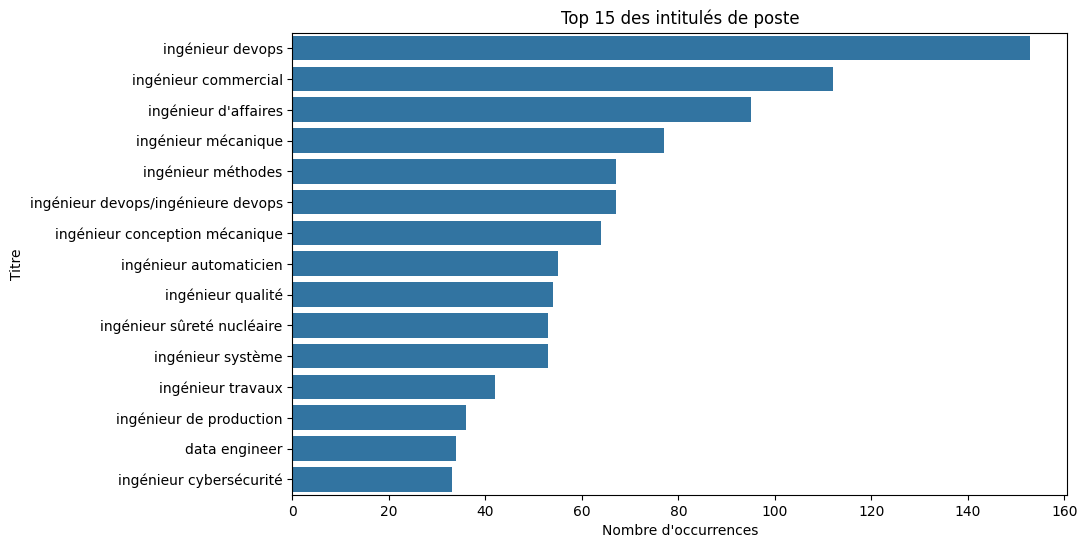

In [ ]:
top_titles = df["title"].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index)
plt.title("Top 15 des intitulés de poste")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Titre")
plt.show()

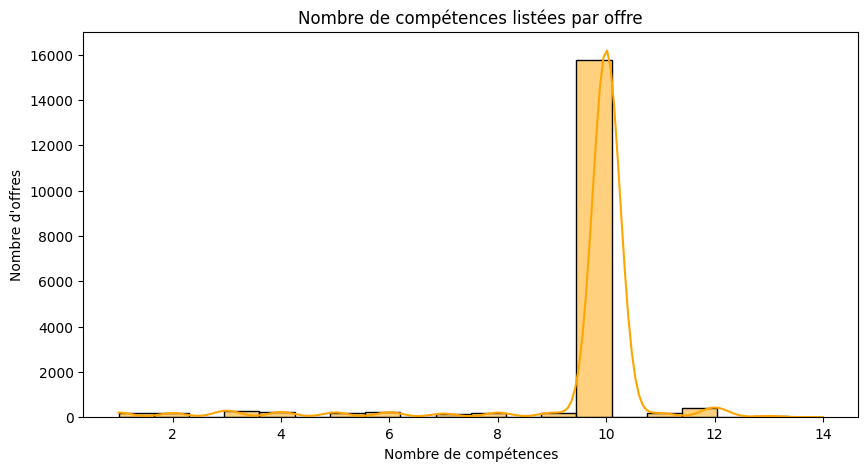

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["nb_competences"], bins=20, kde=True, color='orange')
plt.title("Nombre de compétences listées par offre")
plt.xlabel("Nombre de compétences")
plt.ylabel("Nombre d'offres")
plt.show()

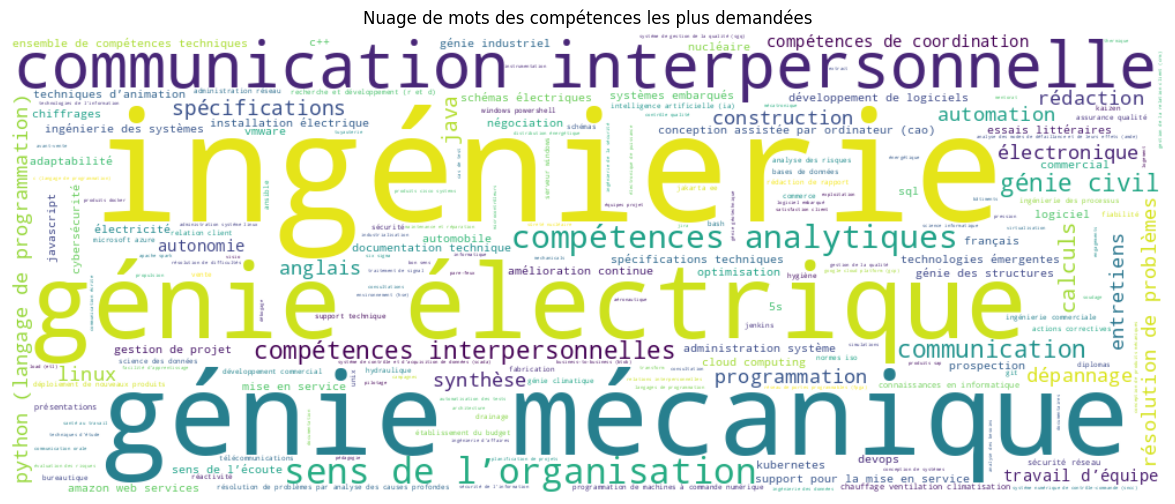

In [ ]:
skills = df["qualifications"].dropna().str.cat(sep=",")
skills_list = [s.strip().lower() for s in skills.split(",") if s.strip()]
freq = Counter(skills_list)

wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(freq)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des compétences les plus demandées")
plt.show()

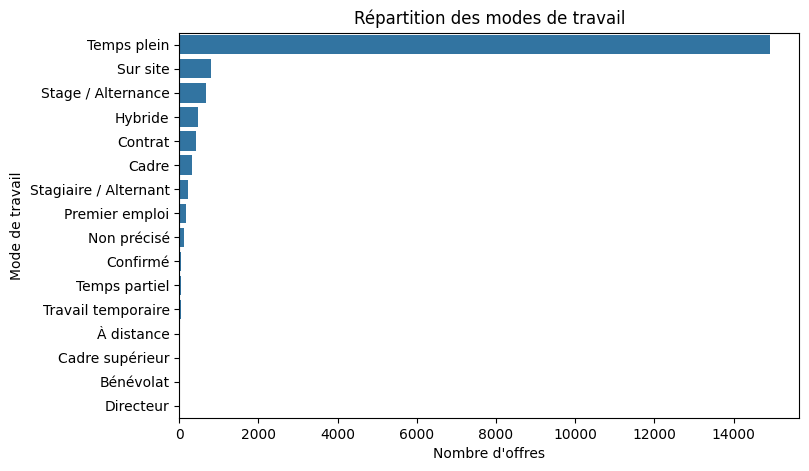

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y="work_mode", data=df, order=df["work_mode"].value_counts().index)
plt.title("Répartition des modes de travail")
plt.xlabel("Nombre d'offres")
plt.ylabel("Mode de travail")
plt.show()

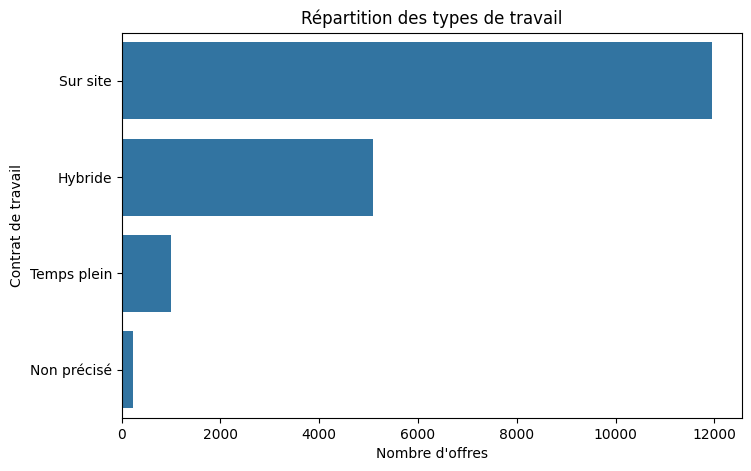

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y="contract_format", data=df, order=df["contract_format"].value_counts().index)
plt.title("Répartition des types de travail")
plt.xlabel("Nombre d'offres")
plt.ylabel("Contrat de travail")
plt.show()

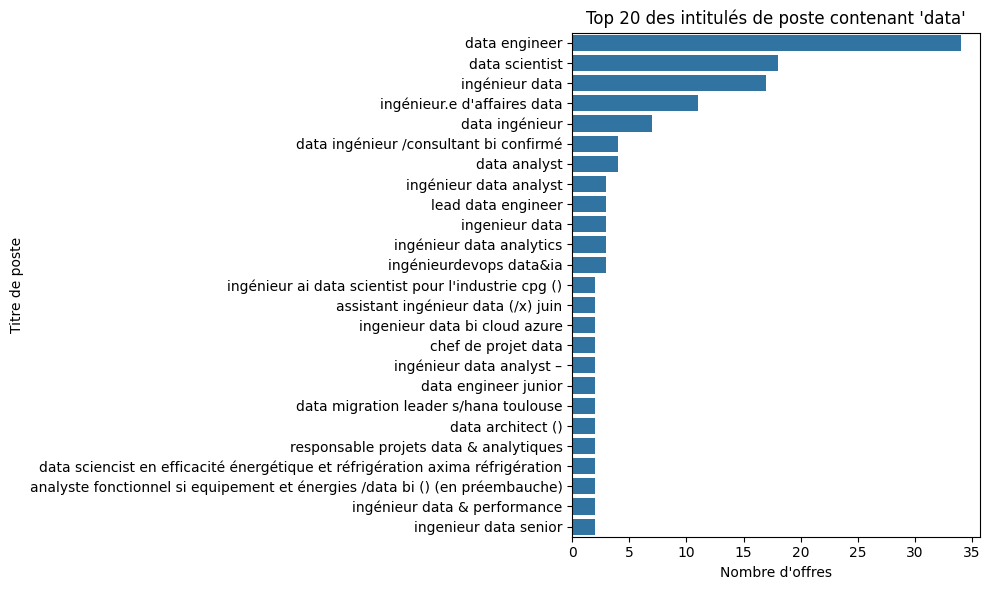

In [ ]:
df_data = df[df["title"].str.contains("data", case=False, na=False)]
top_data_titles = df_data["title"].value_counts().head(25)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_data_titles.values, y=top_data_titles.index)
plt.title("Top 20 des intitulés de poste contenant 'data'")
plt.xlabel("Nombre d'offres")
plt.ylabel("Titre de poste")
plt.tight_layout()
plt.show()

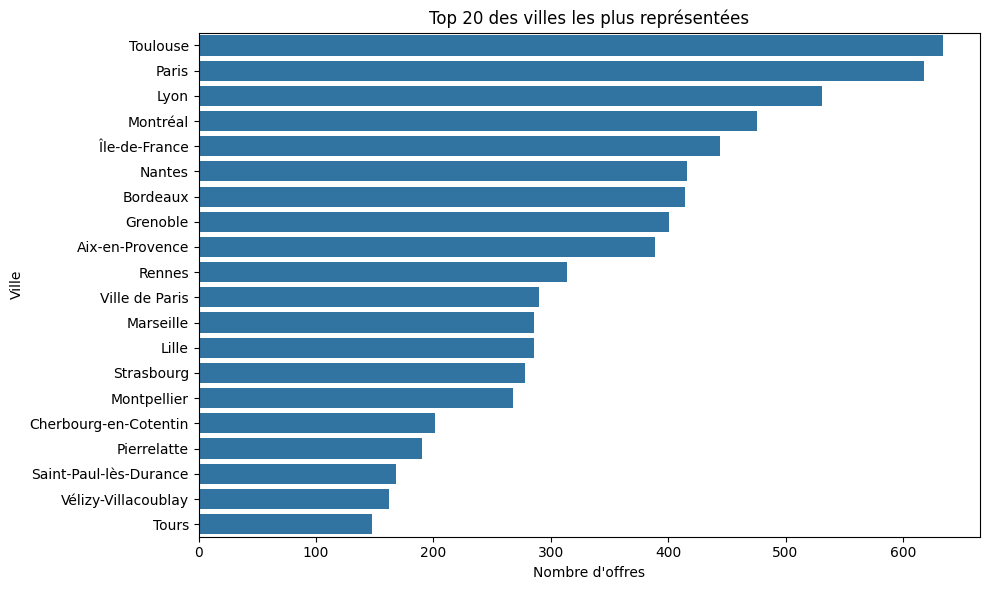

In [ ]:
df["ville"] = df["location"].apply(lambda x: str(x).split(",")[0].strip())

# Top 20 des villes les plus fréquentes
top_villes = df["ville"].value_counts().head(20)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(y=top_villes.index, x=top_villes.values)
plt.title("Top 20 des villes les plus représentées")
plt.xlabel("Nombre d'offres")
plt.ylabel("Ville")
plt.tight_layout()
plt.show()

In [ ]:
#graphique villes
#graphique entreprises
